In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/PCR.csv"
data = pd.read_csv(url)

In [4]:
data.head(16)

,Region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15
0,Arica y Parinacota,252110,70,-,-,103,-,93,24
1,Tarapaca,382773,-,-,-,-,-,-,-
2,Antofagasta,691854,182,128,107,175,103,95,117
3,Atacama,314709,57,52,60,25,20,22,25
4,Coquimbo,836096,-,-,-,-,-,-,-
5,Valparaiso,1960170,301,249,248,273,223,92,385
6,Metropolitana,8125072,5383,3158,2105,3861,1850,1656,2694
7,Del Libertador General Bernardo O’Higgins,991063,68,-,74,-,74,30,30
8,Maule,1131939,397,219,-,341,113,160,-
9,Nuble,511551,364,-,259,189,65,-,-


In [5]:
data = data.replace({"-": 0})         ##Reemplazamos los valores -  con un 0
data = data.replace(np.nan, 0)        ##Reemplazamos los valores no existentes con un 0

In [6]:
for col in data.columns:              ## Cambiamos el tipo de data
    if col != "Region" and col != "Poblacion":
        data[col] = data[col].astype(int)

## Mostramos la Información entregada por el ministerios de Ciencia
* Los valores que están en 0 fueron transformados desde valores no entregados como "-" o NaN. Para un mejor trabajo de los datos. EN NINGUN CASO SIGNIFICA QUE EN ESOS DIAS SE HICIERON 0 TEST POR REGIÓN.

In [7]:
data

,Region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15
0,Arica y Parinacota,252110,70,0,0,103,0,93,24
1,Tarapaca,382773,0,0,0,0,0,0,0
2,Antofagasta,691854,182,128,107,175,103,95,117
3,Atacama,314709,57,52,60,25,20,22,25
4,Coquimbo,836096,0,0,0,0,0,0,0
5,Valparaiso,1960170,301,249,248,273,223,92,385
6,Metropolitana,8125072,5383,3158,2105,3861,1850,1656,2694
7,Del Libertador General Bernardo O’Higgins,991063,68,0,74,0,74,30,30
8,Maule,1131939,397,219,0,341,113,160,0
9,Nuble,511551,364,0,259,189,65,0,0


## Cantidad de tests totales realizados a lo largo del tiempo en el pais

In [8]:
fechas = data.columns[(data.columns != 'Region') & (data.columns != 'Poblacion')]

In [9]:
X = []
Y = []
for fecha in fechas:
    total = data[fecha].sum()
    Y.append(total)
    X.append(fecha)

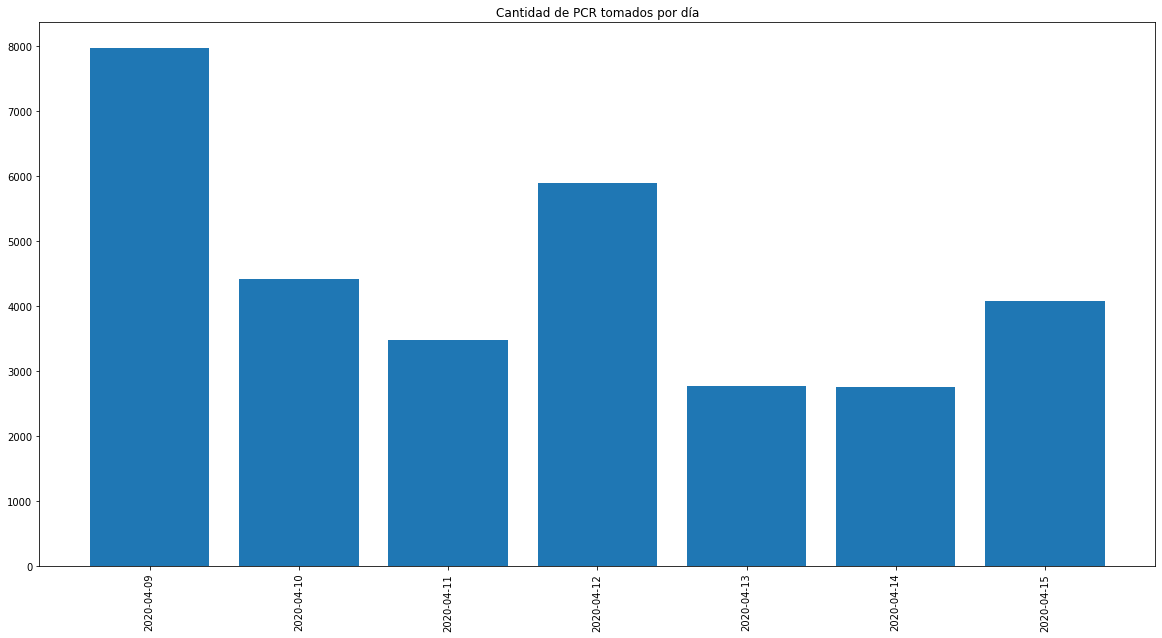

In [12]:
plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.xticks(X, rotation='vertical')
plt.title("Cantidad de PCR tomados por día")
plt.show()